# _Python for Scientific Data Analysis_


#    AstroPy and AstroQuery
## Getting Started
### What is AstroPy [and AstroQuery]?

_**Astropy**_ is a collection of open-source Python software packages for astronomy.  The Wikipedia page gives one version of its history and reason for development.   My personal read is that it was developed for a couple of reasons.  First, that Python as a programming language was catching on in the scientific community, esp in astronomy, and in data science: #1 language for data science now (and for the forseeable future).  

Second, that there were shortcomings with existing ecosystems for reducing and analyzing astronomical data.  A lot of people just didn't like IRAF at all (nor should they: it's awful).   While (my beloved) IDL is a nice language with a huge astronomy library based out of NASA-Goddard and wide usage, 1) its core programming is closed source, 2) it isn't widely used outside of the military or astronomy, planetary science, and adjacent fields, and 3) licensing costs for IDL restricted access can be rough: not everyone has 100-3000 dollars lying around.  Also, Python -- when properly optimized -- can be both _really_ fast and user friendly.  Hence, the need to develop a Python-based astronomy ecosystem to replace these capabilities.   Hence, AstroPy.

Being this core astro ecosystem, AstroPy is usually called in a bunch of other packages that are widely used in astronomy or paired with other existing packages to do different stuff.   A common astronomy-specific package is _**astroquery**_ which, you guessed it, queries all sorts of stuff from databases online.

Our discussion will cover both of these packages.  

### Importing, Sub-packages

The simplest way to get started with astropy is to import the package from Python prompt:
    

In [1]:
import astropy
# we should also do these as is standard

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

However, astropy is a collection of separate packages, so this isn't so useful. Better to just call the packages themselves.   You can do ``from astropy import *`` to import EVERYTHING but this is not a good idea (it takes too long; other reasons, etc.).  Better to name the specific packages you want to open.   I.e. the proper syntax is ``from astropy import [nameofsubpackage]``.   Sometimes it is also easier to rename the subpackages to something shorthand to save time typing.

Some examples below:
    

In [2]:
from astropy.io import fits 
###as an example
#hdulist=fits.open('data.fits') 

from astropy.io import ascii
###as an example
#ascii.read('somerandomfile.txt')

#using abbreviations

from astropy import units as u
from astropy import coordinates as coord

coord.SkyCoord(ra=346.86958*u.deg,dec=21.13425*u.deg) 
#prints out <SkyCoord (ICRS): (ra, dec) in deg
#    (346.86958, 21.13425)>

<SkyCoord (ICRS): (ra, dec) in deg
    (346.86958, 21.13425)>

In [3]:
#a single class
from astropy.table import Table 

Another neat thing AstroPy does is allow you to pull up documentation with _find\_api\_page_ .  E.g.

In [4]:

from astropy import find_api_page
from astropy.io import fits

#this command will pull up documentation
find_api_page(fits)

'https://docs.astropy.org/en/v7.1.1/io/fits/index.html#module-astropy.io.fits'

Will download and then display (in a browser tab) the API page for _fits_. 


### Outline of this Module

In Section 1, we will go over how to use AstroPy to read in data -- images and tables -- stored in the **_fits_** format, display these images (using Matplotlib), deal with data cubes, RGB images, and animatinos.  In Section 2, we will describe reading in and writing files and tables with astropy using astropy.io.**ascii**.  We will also discuss astropy._**units**_ and astropy._**coordinates**_ , including astropy._**wcs**_.   Section 3 deals with database searching using **astroquery**.  Section 4 details with core astronomy data analysis, specifically centroiding and photometry.   

## Section 1: FITS Files

#### _In this section, you will learn the following:_
* Reading in fits files (info, data vs header); Basic image display (imshow, windows); image headers (pulling values, setting values)
* Writing fits files (basic, vs extensions); header changes, etc.
* WCS coordinate overlay with images; annotations; colorbars
* data cubes; creating rgb images; animations for IFS data

### Reading in FITS Files, Image Data and Headers, and Basic Image Display
#### _Startup_
Everyone in astronomy talks uses "FITS" files, which stands for "Flexible Image Transport System" (see this entry in the Library of Congress [https://www.loc.gov/preservation/digital/formats/fdd/fdd000317.shtml]() ).  Basically, when we go to a telescope and take data, the standard in all of astronomy is that those data are stored in the FITS format.  Basically everywhere and always now.  FITS originated in the 1980s when people used FORTRAN to write code that saves data: hence it has some minor quirks that make FORTRAN happy but that are irrelevant for data science-friendly languages you will use like Python (yada yada, no unsigned integers in FORTRAN).    Some astronomers have thought about replacing FITS with "something" ... but apparently no one likes the alternatives.  And like the early vs late-type nomenclature stars, astronomers are resistant to some changes, so we are probably stuck with FITS for good (which is fine: FITS is great!).  

First, you have to import the relevant libraries.  In AstroPy, this will always be `` from astropy.io import fits``
 
If you want to do image processing it usually is helpful to at least import numpy: `` import numpy as np``.  If you want to also _display_ your image, matplotlib is what you want: ``import matplotlib.pyplot as plt``.  So the standard sequence I use every time I want to do anything with a fits file in Python is then as follows:

In [5]:

from astropy.io import fits        #to read in the file
import numpy as np                 #to do all sorts of stats/things useful for image processing etc
import matplotlib.pyplot as plt    #to display
%matplotlib inline

#### _Reading in FITS Files: Data and Header Information_

The first thing to do with a fits file -- again, a file that stores astronomical **_data_** -- is to read it in.   FORTRAN and C do this in a slightly wonky way that seg-faults easily if you don't say the exact magic words.  Python/AstroPy's syntax is nice, tidy, and pretty bulletproof like IDL's _readfits_ syntax (and corresponding _writefits_ to **write** a file): ``fits.open``.   

What to do after opening the file?  

* 1. Get some basic _information_ on the file.
* 2. Read in the **data** and save to an array
* 3. Read in the **header** to get details about the file and other keywords.  

Here, I open an example FITS file obtained from the NIRC2 instrument on the Keck II Telescope and do all three of these steps. 

In [6]:
#***Opening a FITS file***
directory='./code/sect1/files/'
hdu=fits.open(directory+'keckimage.fits')

hdu.info() #get information
#print out the following...
#Filename: keckimage.fits
#No.    Name      Ver    Type      Cards   Dimensions   Format
#  0  PRIMARY       1 PrimaryHDU     268   (512, 512)   float32   

#***Reading in Data from the FITS file***: note the [0] index: it matches the "No." listed where you have image dimensions
image=hdu[0].data 
print(image.shape)
#prints (512, 512)

#***Reading in the FITS header***: again, note the index.
image_header=hdu[0].header
image_header[0:10]
#image_header[0:10] #prints out first 10 elements of the header
len(image_header)

Filename: ./code/sect1/files/keckimage.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     268   (512, 512)   float32   
(512, 512)


268

Note that I save the object created from ``fits.open`` as ``hdu``.   This just follows AstroPy's convention, which defines an _hdu_ as "_the fundamental container structure of the FITS format consisting of a data member and its associated metadata in a header_."  

Now let's explore this file.   First, as the commented-out code block notes, ``hdu.info()`` prints information about then umber of extensions of the fits file, the name of each extension, the type, the length of the header (stored as _card_), the dimensions of the data, and the format of the data.  For this particular file, there is only the primary HDU (index of 0), the header is 268 elements long, the data is a 512x512 array, and the data format is float32 (i.e. double precision).  

Next, ``image=hdu[0].data`` saves the image array as the variable _image_.   The data dimensions (512, 512) are verified by typing ``image.shape`` to get the dimensions of _image_.

Third, ``image_header=hdu[0].header`` saves the header for this FITS file as the variable _header_.   What are the contents of _image\_header_?  Well, first you can figure out its length -- ``len(image_header)`` -- which returns 268 (same value as the _card_).   You can print out different elements of the header.  ``image_header`` prints out the entire header, while ``image_header[0:10]`` prints out the first 10 elements of header:

In [7]:
#note: 'repr' returns "printable string representation of an object"
print(repr(image_header[0:10]))
print(repr(image_header))

SIMPLE  =                    T / Written by IDL:  Sun Mar 18 17:58:42 2018      
BITPIX  =                  -32 / IEEE single precision floating point           
NAXIS   =                    2 / Number of axes                                 
NAXIS1  =                  512 / Number of pixels in axis 1                     
NAXIS2  =                  512 / Number of pixels in axis 2                     
OUTDIR  = '/sdata902/nirc9/2017dec09/            ' / Original directory         
ROOTNAME= 'n                 ' / File prefix                                    
FRAMENO =                   38 / Frame number                                   
FILENAME= 'n0038.fits        ' / Original File name                             
TELESCOP= 'Keck II           ' / Telescope                                      
SIMPLE  =                    T / Written by IDL:  Sun Mar 18 17:58:42 2018      
BITPIX  =                  -32 / IEEE single precision floating point           
NAXIS   =                   

Now, the _data_ values are self-expanatory _except that_ remember that with Python the array values go array(y,x), _not_ array(x,y).  I.e. ``data=hdu[0].data;  data[10:15,120:125]`` stores the data array as the variable _data_ and then returns the values for y = 9 to 13, x= 119 to 123.

Now we can return specific keyword values listed in the header.   The syntax is ``image_header['[name of keyword]']``.   One example in our case is ``image_header['LAT']``, which returns ``19.825``.  

In [8]:
data=image
print(data[10:15,120:125])
lat=image_header['LAT']
print(lat)

[[880.978   893.54315 870.68896 896.5351  925.5936 ]
 [855.0136  861.8519  886.826   873.2155  908.9745 ]
 [926.8046  934.7977  912.68243 910.8498  914.83716]
 [938.1379  965.1365  921.99054 940.1397  943.5649 ]
 [974.8857  984.52997 983.72485 979.4774  955.10864]]
19.825


We can also _modify_ variables listed in the header.  For example, ``objname=image_header['obj']`` returns ``obj``.  The star's name is kappa And, so we can reset this keyword value to be kappa And: ``image_header['OBJECT']=`kappa And'``.   When we print the keyword again, now we get our modified value.   If you write a new FITS file containing this header then the modified value is saved.

In [9]:
objname=image_header['OBJECT']
print(objname)

obj


In [10]:
image_header['OBJECT']='kappa And'

objname=image_header['OBJECT']
print(objname)

kappa And


 What next?  Let's display the image with **matplotlib**.   The key command to do this is ``._imshow``, which is tied to either plt or axes (e.g. ``axes.imshow(image,[bunchofkeywords])``).   Let's use the latter since -- as we saw before -- it allows more flexibility.  
 
 Some important keywords for _imshow_ include: 
 
 * origin - set this to 'lower' to maintain the image[0,0] point at the lower left.  Otherwise matplotlib flips the image upside-down compared to other standard image display programs like DS9.
 
 * cmap - a string. what color map do you use? (default = 'viridis')
 
 * clim - a tuple.  what are the min and max values to display?
 
 Preliminary steps to show an image from ``axes.imshow`` are as before: e.g. ``fig,axes = plt.subplots([keywords])`` and variables (if needed) to set the limits and color maps.  
 
 Now, you can customize further, by setting the region of the image to display from _set\_[x,y]lim_ .   For example, if you want to center the image display upon some coordinates -- center[0] and center[1] -- in y and x with some window size of value _windowsize_ from the displayed image center, then you should set ``axes.set_ylim(center[0]-windowsize,center[0]+windowsize)`` and ``axes.set_xlim(center[1]-windowsize,center[1]+windowsize)``.  
 
  Here's an example call to display our _keckimage.fits_ file, with preliminaries set and a window size of 150 pixels from the center set on the star's location behind the coronagraph of y = 173 and x = 252 (i.e. a box of width 300 x 300 pixels).  I have also added some minor formatting.
  

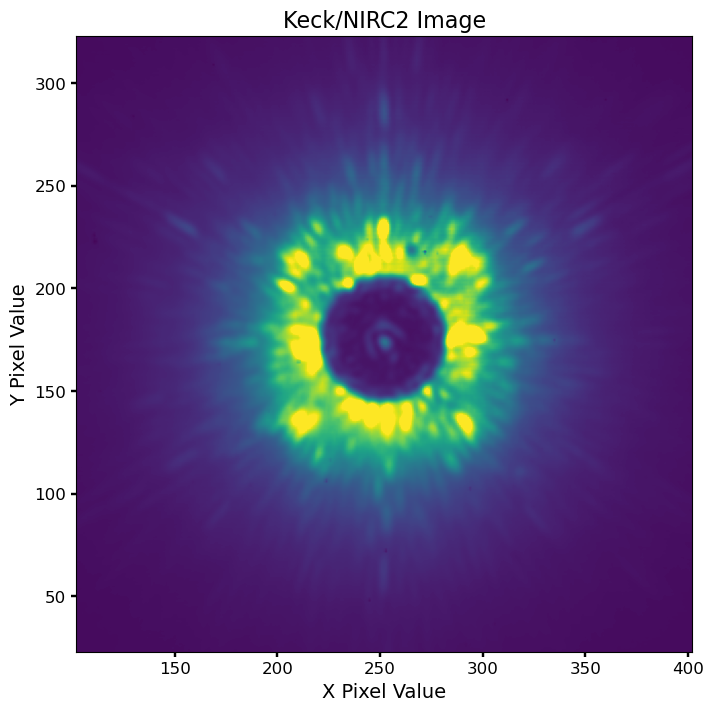

In [11]:
 

 fig,axes = plt.subplots(figsize=(10,8))
 clims=np.nanpercentile(image,[0,99.5]) #display from 0 to the 99.5% value
 axes.imshow(image,origin='lower',cmap='viridis',clim=clims)
 center=np.array([173,252])
 windowsize=150
 axes.set_ylim(center[0]-windowsize,center[0]+windowsize)
 axes.set_xlim(center[1]-windowsize,center[1]+windowsize)
 axes.set_xlabel('X Pixel Value',fontsize=14)
 axes.set_title('Keck/NIRC2 Image',fontsize=16)
 axes.set_ylabel('Y Pixel Value',fontsize=14)
 axes.tick_params(which='both',width='1.75',labelsize=12)
 #plt.show()
# ![](./code/sect1/figures/Ex1_1.png)

 
#### _FITS Files With Extensions; Alternate Way to Read in FITS Data_

 Notice in the preceding example, we used the [0] index on _hdu_ when storing the image data as an array or the header as a variable (e.g. ``image=hdu[0].data``.   And calling _hdu.info()_ shows that FITS file had just a primary header.   But if you ever look at actual data from many telescopes/instruments (e.g. HST), you will see FITS images with _many_ extensions.  E.g. HST data has at least 3 data extensions -- the data, error estimate, and data quality flag.  So we need to read in data and headers from multiple different extensions.
 
 The file "keckimageext.fits" gives an example.   If you save the fits file to a variable and check its info you get the following:
 

In [12]:
directory='./code/sect1/files/'
hdu=fits.open(directory+'keckimageext.fits')
 
hdu.info()
# Filename: ./files/keckimageext.fits
#No.    Name      Ver    Type      Cards   Dimensions   Format
#  0  PRIMARY       1 PrimaryHDU     267   ()      
#  1                1 ImageHDU       269   (512, 512)   float32 

Filename: ./code/sect1/files/keckimageext.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     267   ()      
  1                1 ImageHDU       269   (512, 512)   float32   


Now, you see that there are two extensions: a primary HDU (with a 267-element header but NO dimensions to an image) and an ImageHDU (with a 269-element header and our 512x512 image in double precision).

You can read in primary header by ``hdu[0].header``: e.g. ``primary_header=hdu[0].header``.  The first extension header is then e.g. ``ext_header=hdu[1].header``.   Reading in data from the primary HDU will trigger an error (because there are *no* data assigned to this HDU).   The data lie in the first extension:
``image=hdu[1].data``.

In [13]:

header0=hdu[1].header
#print(repr(header0))

data0=hdu[1].data

print(np.max(data0))

148945.8





Notice in the preceding example, we used the [0] index on _hdu_ when storing the image data as an array or the header as a variable (e.g. ``image=hdu[0].data``.   The simpler way of reading in the image array is the _getdata_ command: image=fits.getdata([/path/to/FITS/file/name of the FITSfile]).  E.g.

In [14]:

image=fits.getdata(directory+'keckimageext.fits')

print(np.max(image))

148945.8


I prefer the indexed way (gives me greater control over what I am reading in), but _getdata_ can work for simple cases.

### Writing FITS Files

#### _The Simple Case; Simple Mark Up of Images_

Writing FITS files to your computer in the minimal case -- one data array and one header -- is pretty straightforward.  It can get slightly more complicated if you have to write extensions.

The simple way to write a new fits file is ``fits.writeto([path+filename],[image array], [header])``.

E.g. ``fits.writeto('/pathtofile/output.fits',image,header)``.   

In this example, we are going to read in two files -- the _keckimage_ file for data on Kappa And that we have been using, and a second file of Kappa And data obtained at a different parallactic angle (in this observing mode, 'north' will point a different direction on the detector).  We will then subtract the files and save the result.  We will also edit the fits header _object_ keyword and add a comment that the data have been "differenced".  

In [15]:
def output():
    
 directory='./code/sect1/files/'

#First Image
 hdu=fits.open(directory+'keckimage.fits')

#data
 image=hdu[0].data
#header
 image_header=hdu[0].header

#dimensions of the image

#Second Image

 hdu2=fits.open(directory+'secondkeckimage.fits')
 image2=hdu2[0].data

 meanval=np.nanmean(image)
 meanval2=np.nanmean(image2)

 psfsubimage=image-image2*(meanval/meanval2)
 #psfsubimage=image-image2

 #update the header
 image_header['OBJECT']='kappa And'

#write the new file
 fits.writeto(directory+'psfsubimage.fits',psfsubimage,image_header,overwrite=True)
 
#display the new file
 fig,axes=plt.subplots(figsize=(10,8))

 clims=np.nanpercentile(psfsubimage,[3,99])

 axes.imshow(psfsubimage,origin='lower',clim=clims) #change the origin

 axes.set_title('Simple PSF Subtraction',fontsize=18)
 axes.set_xlabel('X Pixel Value',fontsize=14)
 axes.set_ylabel('Y Pixel Value',fontsize=14)

 center=np.array([173,252])
 windowsize=150
 axes.set_ylim(center[0]-windowsize,center[0]+windowsize)
 axes.set_xlim(center[1]-windowsize,center[1]+windowsize)
 
 axes.add_patch(plt.Circle([318,111],10,color='white',fill=False))

 #Other way ...
 #from matplotlib.patches import Circle
 #circle1=Circle([318,111],10,color='magenta',fill=False)
 #axes.add_patch(circle1)

# plt.show()


# ![](./code/sect1/figures/Ex1_2.png)

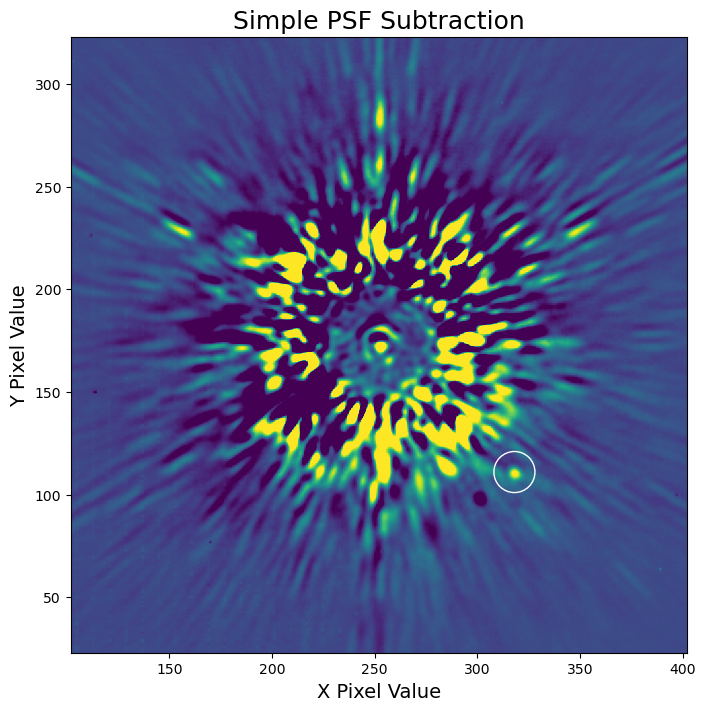

In [16]:
output()

 
 Note that if you read in `` `psfsubimage.fits' `` -- e.g. do `` from astropy.io import fits; image=fits.open('psfsubimage.fits')[0].data; header=fits.open('psfsubimage.fits')[0].header `` and print the value of the variable OBJECT by doing ``header['OBJECT']`` Python will return 'kappa And' as the value, not 'obj': i.e. our change the the fits header was saved in the new file.   
 
 Note also that dot at the 4 o'clock position: that is the planet kappa Andromedae b!  To annotate the figure to highlight this detection, we circle it.  The circle is a patch, so we need to _add\_patch_ to the axes.   The code above gives two different ways to add a circle the image. 
 

 
 #### Writing FITS Files With Extensions
 
What if you have a fits file with multiple extensions?  The syntax is slightly more involved in that case.   Here's a way to make it work:

(102.0, 402.0)

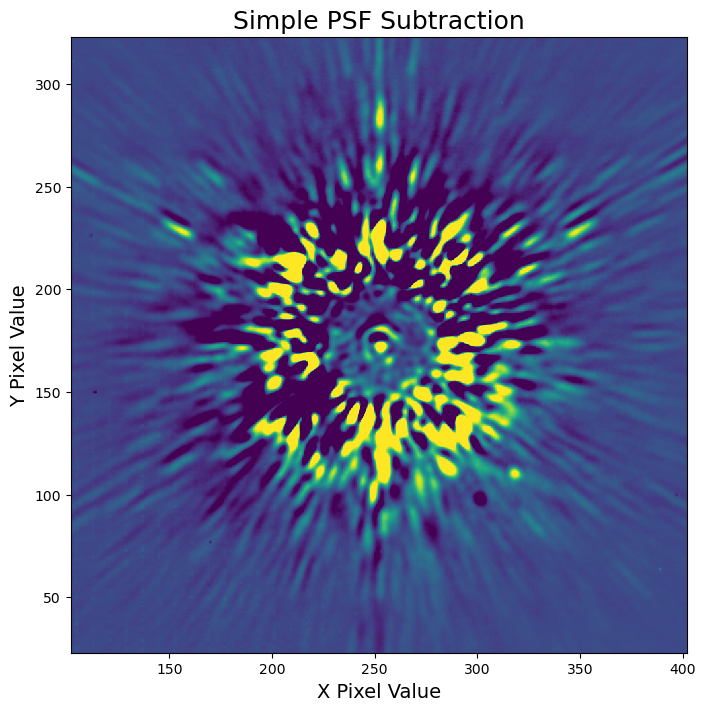

In [17]:
 directory='./code/sect1/files/'

#First Image
 hdu=fits.open(directory+'keckimageext.fits')

#data
 image=hdu[1].data
#header
 image_header0=hdu[0].header
 image_header1=hdu[1].header

#dimensions of the image

#Second Image

 hdu2=fits.open(directory+'secondkeckimage.fits')
 image2=hdu2[0].data

 meanval=np.nanmean(image)
 meanval2=np.nanmean(image2)

 psfsubimage=image-image2*(meanval/meanval2)
 #psfsubimage=image-image2

 #update the header
 image_header0['OBJECT']='kappa And'

 fits.HDUList([fits.PrimaryHDU(header=image_header0),fits.ImageHDU(psfsubimage,
            header=image_header1)]).writeto(directory+'psfsubext.fits',overwrite=True)

#simple display
 fig,axes=plt.subplots(figsize=(10,8))

 clims=np.nanpercentile(psfsubimage,[3,99])

 axes.imshow(psfsubimage,origin='lower',clim=clims) #change the origin

 axes.set_title('Simple PSF Subtraction',fontsize=18)
 axes.set_xlabel('X Pixel Value',fontsize=14)
 axes.set_ylabel('Y Pixel Value',fontsize=14)

 center=np.array([173,252])
 windowsize=150
 axes.set_ylim(center[0]-windowsize,center[0]+windowsize)
 axes.set_xlim(center[1]-windowsize,center[1]+windowsize)

# plt.show()

This is a little wonky but the syntax is basically as follows: HDUList= [some tuple of HDUs], where the tuple includes a  PrimaryHDU and an ImageHDU.   Usually, the Primary HDU does not have any image arrays attached to it.   So we define a 1) header for the PrimaryHDU and 2) a data array (i.e. the image) _and_ a header for the ImageHDU.

Now, we can add as many image extensions as we want.   Here's an example where we have a PrimaryHDU and _four_ ImageHDUs:

In [18]:
from astropy.io import fits

director='./code/sect1/files/'
hdu=fits.open(directory+'keckimage.fits')
header=hdu[0].header
data=hdu[0].data
primaryhdu=fits.PrimaryHDU(header=header)
imagehdu=fits.ImageHDU(data,header=header)

fits.HDUList([fits.PrimaryHDU(header=header),fits.ImageHDU(data,header=header),
   fits.ImageHDU(data,header=header),fits.ImageHDU(data,header=header),
               fits.ImageHDU(data,header=header)]).writeto(directory+'lotsofextens.fits',overwrite=True)

#fits.HDUList([fits.PrimaryHDU(data,header=header),fits.ImageHDU(data,header=header),
#   fits.ImageHDU(data,header=header),fits.ImageHDU(data,header=header),
#               fits.ImageHDU(data,header=header)]).writeto(directory+'lotsofextens.fits',overwrite=True)

Then if we read the file back in, we see the following ...

In [19]:
from astropy.io import fits
director='./code/sect1/files/'
hdu=fits.open(directory+'lotsofextens.fits')
hdu.info()
#No.    Name      Ver    Type      Cards   Dimensions   Format
#  0  PRIMARY       1 PrimaryHDU     267   ()      
#  1                1 ImageHDU       270   (512, 512)   float32   
#  2                1 ImageHDU       270   (512, 512)   float32   
#  3                1 ImageHDU       270   (512, 512)   float32   
#  4                1 ImageHDU       270   (512, 512)   float32   

Filename: ./code/sect1/files/lotsofextens.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     267   ()      
  1                1 ImageHDU       270   (512, 512)   float32   
  2                1 ImageHDU       270   (512, 512)   float32   
  3                1 ImageHDU       270   (512, 512)   float32   
  4                1 ImageHDU       270   (512, 512)   float32   


### More Mark Ups: WCS coordinate overlay with Images; Colorbars


Astronomical images have coordinates since they correspond to regions on the sky (e.g. right ascension/declination; Galactic coordinates, etc.).  So units for displayed images that are different from X and Y pixel coordinates are a good thing.   Here, we cover one widely-used example: overplotting right ascension and declination.

Right ascension and declination are examples of the World Coordinate System (WCS).  So the first step is to import the Python function that deals with WCS: ``from astropy.wcs import WCS`` .  We need to map WCS onto the pixel coordinates using information in the FITS header.  If you have a valid FITS header, you can then _project_ the WCS coordinate system onto your image.   A simple way to do this is in the _fig,axes= plt.subplots()_ call: ``fig,axes=plt.subplots(subplot_kw={'projection':wcs})``.   Then the x and y coordinates displayed will be RA and DEC.  Below is a simple example:

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


(102.0, 402.0)

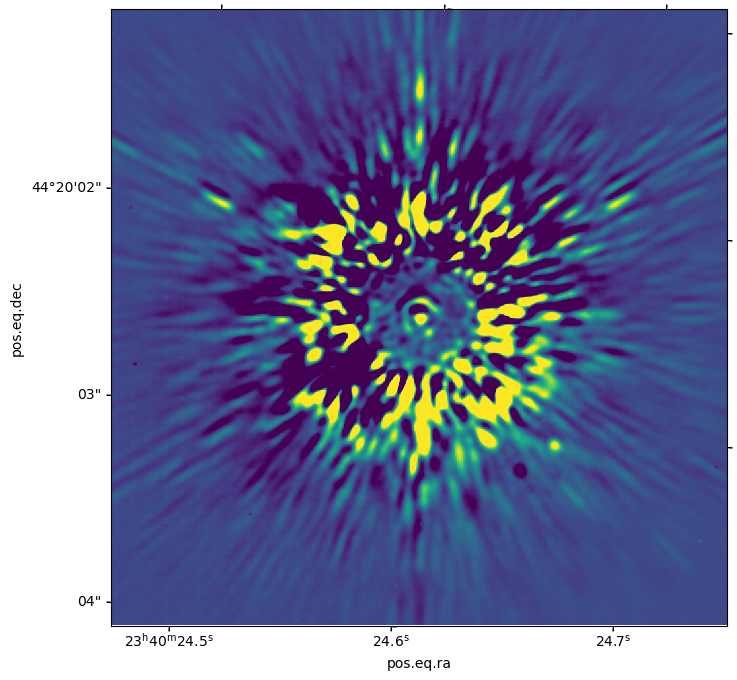

In [20]:

 from astropy.wcs import WCS

 directory='./code/sect1/files/'

 hdu=fits.open(directory+'psfsubimage.fits')

#data
 image=hdu[0].data
 image_header=hdu[0].header

#dimensions of the image

 wcs=WCS(image_header)
#simple display
 fig,axes=plt.subplots(subplot_kw={'projection':wcs},figsize=(10,8))

 clims=np.nanpercentile(image,[3,99])

 axes.imshow(image,origin='lower',clim=clims) #change the origin

#customize
 center=np.array([173,252])
 windowsize=150
 axes.set_ylim(center[0]-windowsize,center[0]+windowsize)
 axes.set_xlim(center[1]-windowsize,center[1]+windowsize)

# plt.show()

#![](./code/sect1/figures/Ex1_3a.png)

Now, if you look at the image carefully, at the image as displayed in DS9 (which displays WCS properly), or if you just know something about kappa Andromeda, you'll notice that the RA values are _decreasing_ up and DEC values _decreasing_ to the right.  Also, the labeling for RA and DEC are a bit sophomoric.  

We can fix this by deleting the axis labeling -- setting the axis ticks, labels, and axis labels to empty strings --and hiding the ticklabels entirely but adding an _overlay_.   

Now, marking up _overlay_ properly takes a bit of work (and see the silly astropy version note below).   Best to just show an example with annotations:

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


(102.0, 402.0)

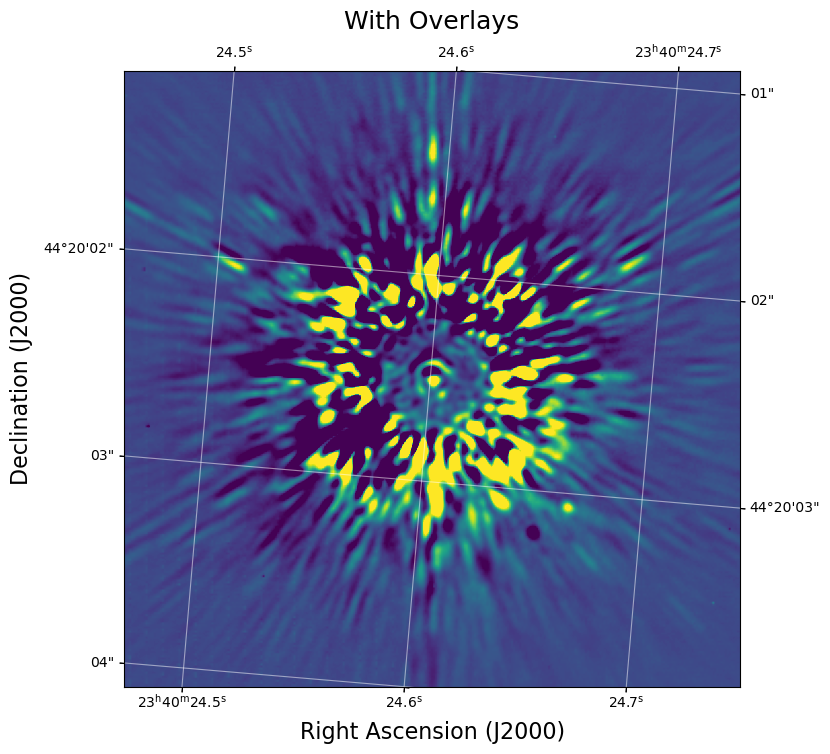

In [24]:
 directory='./code/sect1/files/'

 hdu=fits.open(directory+'psfsubimage.fits')

#data
 image=hdu[0].data
 image_header=hdu[0].header

 wcs=WCS(image_header)
 fig,axes=plt.subplots(subplot_kw={'projection':wcs},figsize=(10,8))


######NOTE###### ###the following below works around recent AstroPy breakage for its newer WCSAxes. 
#The autocoord position assignment fails when. you hide native coordinates and overlays. why? no idea why they did this.

#setting the axis ticks, labels, and axis labels to empty strings
 axes.coords[0].set_ticks_position('')
 axes.coords[0].set_ticklabel_position('')
 axes.coords[0].set_axislabel_position('')
 axes.coords[1].set_ticks_position('')
 axes.coords[1].set_ticklabel_position('')
 axes.coords[1].set_axislabel_position('')

###END NOTE

#hiding the ticklabels
 axes.coords[0].set_ticklabel_visible(False)
 axes.coords[1].set_ticklabel_visible(False)

 overlay=axes.get_coords_overlay('fk5')
 overlay[0].set_major_formatter('hh:mm:ss.s') #to move the formatting out of degrees for RA
 overlay.grid(color='white',ls='solid',alpha=0.5)

 overlay[0].set_axislabel('Right Ascension (J2000)',fontsize=16)
 overlay[1].set_axislabel('Declination (J2000)',fontsize=16)
 overlay[0].set_axislabel_position('b') #b=bottom,l=left,t=top,r=right
 overlay[1].set_axislabel_position('l')

 overlay[0].set_ticklabel_position('bt')
 overlay[1].set_ticklabel_position('lr')

 clims=np.nanpercentile(image,[3,99])

 axes.imshow(image,origin='lower',clim=clims) #change the origin
 #padding more than the default of 6 to make sure labels don't collide
 axes.set_title('With Overlays',fontsize=18,pad=30) 
#customize
 center=np.array([173,252])
 windowsize=150
 axes.set_ylim(center[0]-windowsize,center[0]+windowsize)
 axes.set_xlim(center[1]-windowsize,center[1]+windowsize)

# plt.show()

# ![](./code/sect1/figures/Ex1_3b.png)

 
 The grid connects constant values of RA and DEC, and you can see it is a) slanted and b) upside-down compared to "north up, east left" orientation we are familiar with in astronomy.
 
 
 Now, see this example where -- through another program -- I rotate the PSF-subtracted image "north up". 
 

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


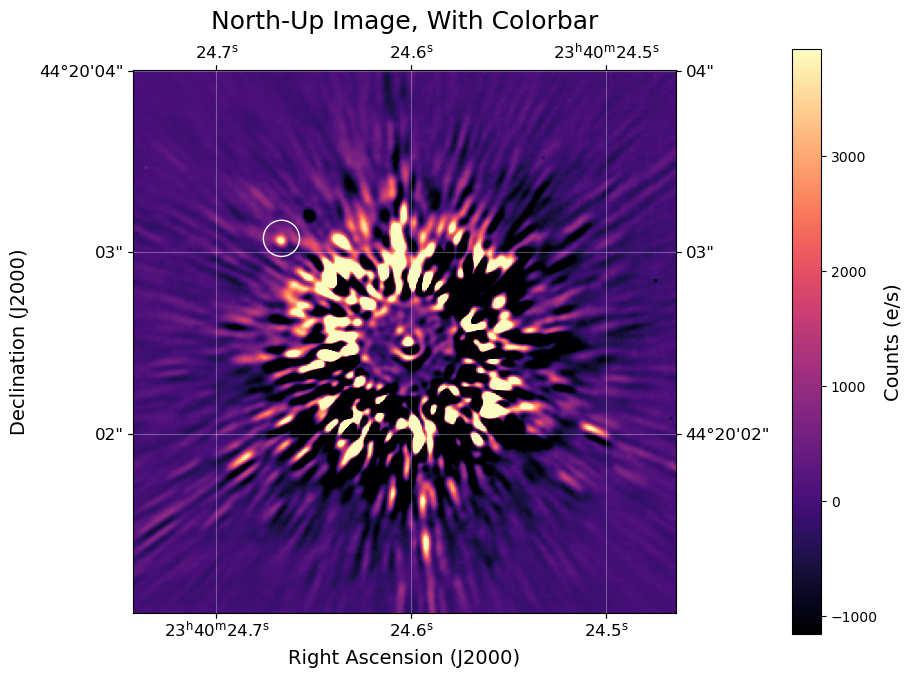

In [26]:
from matplotlib.ticker import AutoMinorLocator
def ex1_3():
 directory='./code/sect1/files/'

 #doing this instead of image=(fits.open[filename])[0].data
 image=fits.getdata(directory+'psfsubimage_northup.fits')

 image_header=(fits.open(directory+'psfsubimage_northup.fits'))[0].header

 wcs=WCS(image_header)
 fig,axes=plt.subplots(subplot_kw={'projection':wcs},figsize=(10,8))

 axes.coords[0].set_ticks_position('')
 axes.coords[0].set_ticklabel_position('')
 axes.coords[0].set_axislabel_position('')
 axes.coords[1].set_ticks_position('')
 axes.coords[1].set_ticklabel_position('')
 axes.coords[1].set_axislabel_position('')

 axes.coords[0].set_ticklabel_visible(False)
 axes.coords[1].set_ticklabel_visible(False)
 overlay=axes.get_coords_overlay('fk5')
 overlay[0].set_major_formatter('hh:mm:ss.s')
 overlay.grid(color='white',ls='solid',alpha=0.3)

 overlay[0].set_axislabel('Right Ascension (J2000)',size=14)
 overlay[1].set_axislabel('Declination (J2000)',size=14)
 overlay[0].set_axislabel_position('b')
 overlay[1].set_axislabel_position('l')


 overlay[0].set_ticklabel(size=12)
 overlay[1].set_ticklabel(size=12)
 overlay[0].set_ticklabel_position('bt')
 overlay[1].set_ticklabel_position('lr')

 clims=np.nanpercentile(image,[3,99])

 #axes.imshow(image,origin='lower',clim=clims,cmap='magma') #change the origin
#you need to do the below in order to display a colorbar
 image1=axes.imshow(image,origin='lower',clim=clims,cmap='magma') #change the origin

#customize
#it's different than before since the star was not at the center and the program I use to 'north-up' the image rotates from the image center
 center=np.array([340,250])
 windowsize=150
 axes.set_ylim(center[0]-windowsize,center[0]+windowsize)
 axes.set_xlim(center[1]-windowsize,center[1]+windowsize)

 axes.tick_params(which='both',width='1.75')
 axes.tick_params(which='major',length=7)
 axes.tick_params(which='minor',length=3.5)
 axes.xaxis.set_minor_locator(AutoMinorLocator(5))
 axes.set_title("North-Up Image, With Colorbar",fontsize=18,pad=30)
 
 axes.add_patch(plt.Circle([182,397],10,color='white',fill=False))

 cbar=fig.colorbar(image1,orientation='vertical',pad=0.15,shrink=0.95)
 cbar.set_label(label='Counts (e/s)',size=14)


 #plt.show()
 
 #```
 # ![](./code/sect1/figures/Ex1_3c.png)
  

ex1_3()

  ----
  ### RGB Images, Data Cubes, and Animations
  
  #### _RGB Cubes_
  
  Astronomical images are obtained in different passbands, whereas the human retina has red, green, and blue-sensing cones to render the visible portion of the electromagnetic spectrum into stereo color.   For astronomy, we can mimick this somewhat with _RGB_ composite images.   Combining AstroPy with Matplotlib allows us to create nice composite RGB images from three separate FITS files.   
  
  The key trick to making this work is with the _imshow_ call.  Instead of e.g. ``axes.imshow(image,*kwargs)`` where image is a simple 2-D array, we call ``axes.imshow(image_cube,*kwargs)`` where image_cube has dimensions of x,y,3: i.e. it is a data cube consisting of three separate image arrays where red, green, and blue are _image\_cube[:,:,0]_ , _image\_cube[:,:,1]_ , and _image\_cube[:,:,2]_ , respectively.  If you load this type of array into _imshow_, matplotlib automatically thinks you are trying to do an RGB composite image.
  

  
  However, the display scaling is slightly tricky.  With no adjustments, you may get this notification: ``Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).``.    That is, if your array consists of floating-point data (it will), matplotlib will clip out all pixel values lying outside of the range 0 to 1.   
  
  Therefore, you will need to normalize each image going into an RGB image.  E.g.  if you want to do an RGB image of a galaxy and bright regions of the galaxy in the R,G, and B images have a characteristic value of 3500, 3000, and 2000 counts then you will need to divide your images by 3500, 3000, and 2000,respectively.  Values larger than this will be set to 1 (i.e. the maximum color).   Values less than 0 will be clipped out and will appear completely black.
  
  Below is an example of an RGB image of the star HIP 99770 drawn from Subaru Telescope data at J (1.25 microns), H (1.65 microns), and Ks (2.16 microns), showing the detection of the exoplanet HIP 99770 b, which appears white-ish red (since I have normalized the J, H, and K images to characteristic peak values for the planet and the planet is intrinsically red).
  
  I have also added some minor markups, remapping the image x and y coordinates into an offset from the star's center by the _extent_ parameter in _imshow_ , adding a "hanning" pixel interpolation, and and adding a star symbol to denote the star's position.
  

<>:65: SyntaxWarning: invalid escape sequence '\D'
<>:66: SyntaxWarning: invalid escape sequence '\D'
<>:65: SyntaxWarning: invalid escape sequence '\D'
<>:66: SyntaxWarning: invalid escape sequence '\D'
/var/folders/jd/2nq0dfy94lsddczv0kg2y33h0000gn/T/ipykernel_62293/4132778518.py:65: SyntaxWarning: invalid escape sequence '\D'
  axes.set_xlabel('$\Delta RA(^{\prime\prime})$',fontsize=16)
/var/folders/jd/2nq0dfy94lsddczv0kg2y33h0000gn/T/ipykernel_62293/4132778518.py:66: SyntaxWarning: invalid escape sequence '\D'
  axes.set_ylabel('$\Delta DEC(^{\prime\prime})$',fontsize=16)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/Users/thaynecurrie/anaconda3/lib/python3.12/site-packages/matplotlib/cm.py:494: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


(201, 201)
201


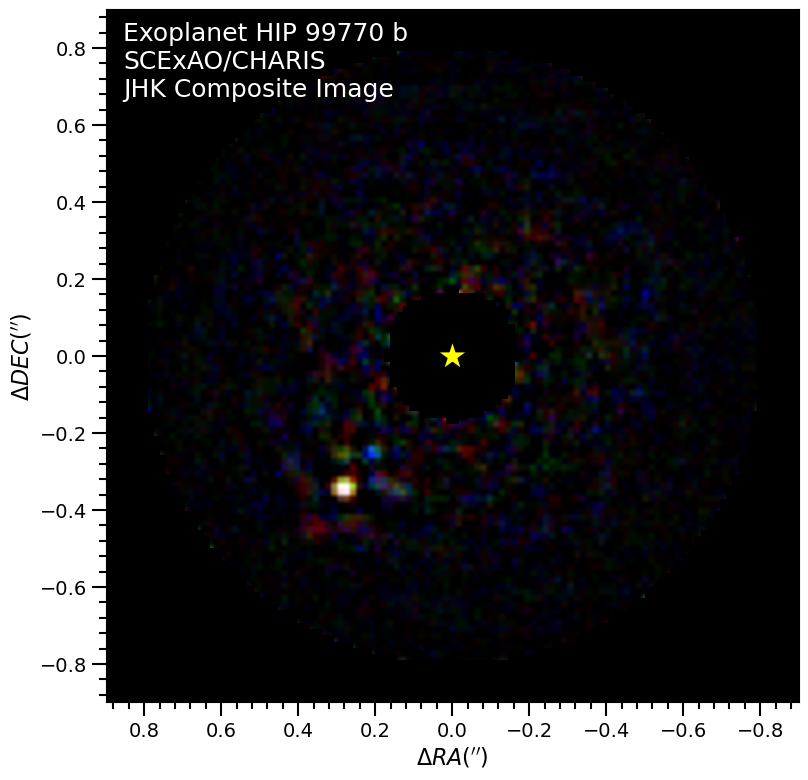

In [27]:
def ex1_4():
    
 directory='./code/sect1/files/'
 jband=(fits.open(directory+'jband2.fits'))[0].data
 hband=(fits.open(directory+'hband2.fits'))[0].data
 kband=(fits.open(directory+'kband2.fits'))[0].data

 cmaps=['Blues','Greens','Reds']

 fig,axes=plt.subplots(figsize=(9,9))

 #import img_scale
 imagecomb=np.zeros((201,201,3),dtype=float)
 print(kband.shape)
 jnorm=0.04
 hnorm=0.03
 knorm=0.035

 jnorm=0.0375
 hnorm=0.0325
 knorm=0.0325
 imagecomb[:,:,0]=kband/knorm
 imagecomb[:,:,1]=hband/hnorm
 imagecomb[:,:,2]=jband/jnorm

 import astropy.units as u

 #converting to arcsec
 print((jband.shape)[0])
 pixscale=0.01615*(u.arcsec/u.pixel)

 dim=(jband.shape)[0]
 distfromcenter=np.array([0,dim,0,dim])-100

 distfromcenter=distfromcenter << u.pixel
 pixscale = pixscale << u.arcsec/u.pixel
 distfromcenter_arcsec=(distfromcenter*pixscale).value

 distfromcenter_arcsec[0]*=-1.0
 distfromcenter_arcsec[1]*=-1.0

 #print(distfromcenter_arcsec[0])
 #exit()

 rmax=0.9 #in units of arc-seconds
 extrange=[rmax,-1*rmax,-1*rmax,rmax]

 #extent goes 'left right bottom top'
 pixelscale=0.01615
 fullext_image=pixelscale*(jband.shape)[0]/2.0

 #interpval='none'
 interpval='hanning'
    
 axes.imshow(imagecomb,origin='lower',extent=[fullext_image,-1*fullext_image,-1*fullext_image,fullext_image],interpolation=interpval)

 axes.set_xlim(rmax,-1*rmax)
 axes.set_ylim(-1*rmax,rmax)
 axes.tick_params(which='both',direction='out',labelsize=14)
 axes.tick_params(which='major',length=10,width=1.5)
 axes.tick_params(which='minor',length=5,width=1.5)
 axes.xaxis.set_minor_locator(AutoMinorLocator(5))
 axes.yaxis.set_minor_locator(AutoMinorLocator(5))

 axes.set_xlabel('$\Delta RA(^{\prime\prime})$',fontsize=16)
 axes.set_ylabel('$\Delta DEC(^{\prime\prime})$',fontsize=16)
 #axes.set_title('HIP 99770 b (JHK Composite Image)',fontsize=18,pad=25)

 axes.scatter(0,0,marker='*',c='yellow',edgecolor='black',s=500)
 axes.text(0.95*rmax,0.75*rmax,'Exoplanet HIP 99770 b\nSCExAO/CHARIS\nJHK Composite Image',fontsize=18,color='w')

 plt.show()
  
ex1_4()
# ![](./code/sect1/figures/Ex1_4.png)

#### _Data Cubes_

The example above read in three separate FITS images and combined them together to make an RGB composite image.  Another type of file you will get in astronomy is a _data cube_ , which will have spatial dimensions and then one extra dimension.   These are typical in integral field spectrograph data where the extra dimension is wavelength (i.e. as you scroll through the cube, you are viewing images at different wavelengths).  Now the dimension ordering with a data cube can different than what you are used to with other languages (e.g. IDL or, God forbid, Fortran).   

Here's an example of a data cube: SCExAO/CHARIS data for HIP 99770 b (we created the J,H, and K images from this cube):

In [28]:

 #from astropy.io import fits
directory='./code/sect1/files/'
data_cube=fits.open(directory+'asdicomb_indiv.fits')[0].data
print(data_cube.shape)
 #prints out (22,201,201), i.e. lambda, y, x; NOT x,y,lambda
    

#othercube=fits.open(directory+'adi_oct172021.fits')
#oh0=othercube[0].header
#oh1=othercube[1].header
#print(repr(oh1))

(22, 201, 201)


Note, though, what happens when we ask the dimensionality of this cube (i.e. its shape): it is lambda, y, x; NOT x,y,lambda order.  Keep that in mind.

#### _Animations_

Now, you can create an **animation** scrolling through each slice of a data cube or each image in a collection of images (note: you can also create an animated plot as well).  The two key functions to do this are _FuncAnimation_ and _ArtistAnimation_ .  Both will work with images, but with _FuncAnimation_ you have to create an animation function that is called; with _ArtistAnimation_ you just need to create a list of artists (i.e. images + other markups).   

The API for both are here
[https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html]()

and here
[https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.ArtistAnimation.html]()

We will first demonstrate _ArtistAnimation_ below for an animated plot of a mathematical function, following official documentation:

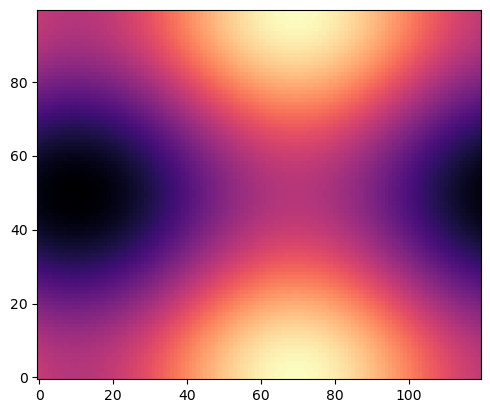

In [29]:
from matplotlib import animation

def ex1_5():

 fig, ax = plt.subplots()


 directory='./code/sect1/files/'
 x = np.linspace(0, 2 * np.pi, 120)
 y = (np.linspace(0, 2 * np.pi, 100))[:,None]
 #y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1) #this also works ... basically, though, we need to create a 2D array from the combination of x and y either way

#a short function call
 def f(x,y):
  return np.sin(x) + np.cos(y)

 # ims is a list of lists, each row is a list of artists to draw in the
 # current frame; here we are just animating one artist, the image, in
 # each frame
 ims = []
 for i in range(60):
     x += np.pi / 45 #15
     y += np.pi / 30
     im = ax.imshow(f(x, y), animated=True,cmap='magma',origin='lower')
     if i == 0:
         ax.imshow(f(x, y),cmap='magma',origin='lower')  # show an initial one first
     ims.append([im])

 ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,
                                 repeat_delay=1000)

 # To save the animation, use e.g.
 #
 # writer = animation.FFMpegWriter(fps=10,bitrate=1800)
 # ani.save("movie.mp4", writer=writer)

 #for a gif

 writergif = animation.PillowWriter(fps=10)
 ani.save(directory+'ex1_5.gif',writer=writergif)

 plt.show() #displays a quick-look animation, often useful

ex1_5()
#![](./code/sect1/files/ex1_5.gif)

In this example, we save the animated plot as a gif.   The comments note how to do this using FFMpegWriter to produce an mp4 file.  **CAUTION** using FFMpegWriter can get very tricky, though, as it is prone to throwing errors, especially on older laptops.  The fool-proof way to get this to work is to download a precompiled ffmpeg driver appropriate for your OS and add its location to your \$PATH variable.   Here are several ways of getting this to work on a Mac OS:
[https://phoenixnap.com/kb/ffmpeg-mac]().   Since getting FFMpegWriter properly set up can get very computer-specific, I'm using gifs created using PillowWriter in all examples.

Here's another, arguably more useful example.   In this case, we animate the HIP 99770 b data cube and save it as a gif and then an mp4 file using FFMpegWriter.

<>:33: SyntaxWarning: invalid escape sequence '\D'
<>:34: SyntaxWarning: invalid escape sequence '\D'
<>:33: SyntaxWarning: invalid escape sequence '\D'
<>:34: SyntaxWarning: invalid escape sequence '\D'
/var/folders/jd/2nq0dfy94lsddczv0kg2y33h0000gn/T/ipykernel_62293/603941344.py:33: SyntaxWarning: invalid escape sequence '\D'
  axes.set_xlabel('$\Delta RA(^{\prime\prime})$',fontsize=16)
/var/folders/jd/2nq0dfy94lsddczv0kg2y33h0000gn/T/ipykernel_62293/603941344.py:34: SyntaxWarning: invalid escape sequence '\D'
  axes.set_ylabel('$\Delta DEC(^{\prime\prime})$',fontsize=16)
/var/folders/jd/2nq0dfy94lsddczv0kg2y33h0000gn/T/ipykernel_62293/603941344.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  R,G,B,A = mpl.cm.get_cmap('gist_heat')(np.linspace(0.0,1.0,256)).T


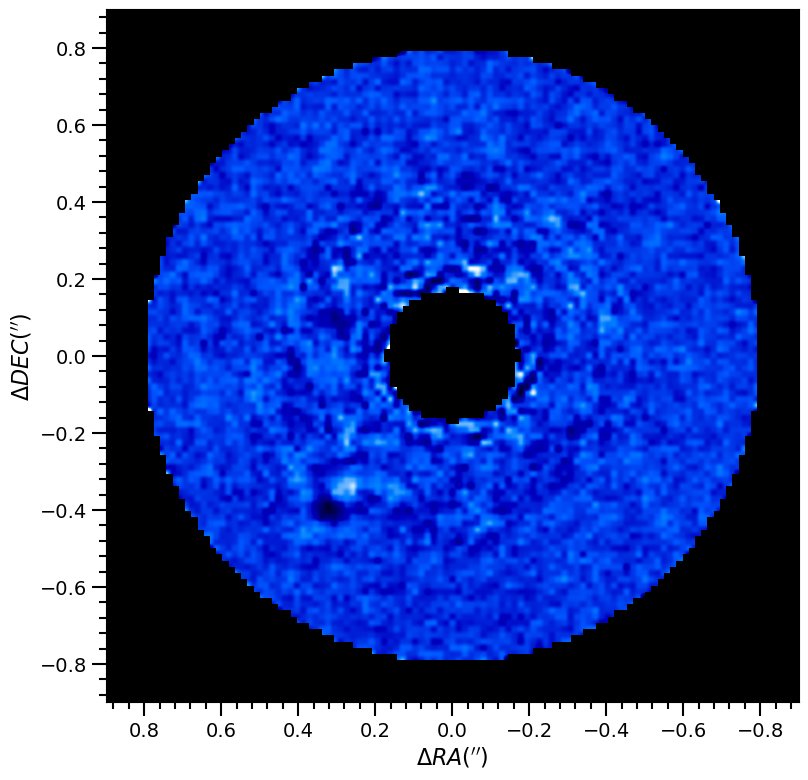

In [30]:
 import matplotlib as mpl
 R,G,B,A = mpl.cm.get_cmap('gist_heat')(np.linspace(0.0,1.0,256)).T
 color_vals = np.array([B,G,R,A]).T
 cmap1 = mpl.colors.ListedColormap(color_vals) # colormap for CHARIS image
 cmap1.set_bad('k')

 directory='./code/sect1/files/'
 data_cube=(fits.open(directory+'asdicomb_indiv.fits'))[0].data

 n_lambda=(data_cube.shape)[0]

#general formatting

 rmax=.9 #in units of arc-seconds
 pixelscale=0.01615
 extrange=[rmax,-1*rmax,-1*rmax,rmax]

 fullext_image=pixelscale*(data_cube.shape)[1]/2.0

 cmapval='plasma'
 cmapval=cmap1

 fig,axes=plt.subplots(figsize=(9,9))
 immovie=[]

 axes.set_xlim(rmax,-1*rmax)
 axes.set_ylim(-1*rmax,rmax)
 axes.tick_params(which='both',direction='out',labelsize=14)
 axes.tick_params(which='major',length=10,width=1.5)
 axes.tick_params(which='minor',length=5,width=1.5)
 axes.xaxis.set_minor_locator(AutoMinorLocator(5))
 axes.yaxis.set_minor_locator(AutoMinorLocator(5))
 axes.set_xlabel('$\Delta RA(^{\prime\prime})$',fontsize=16)
 axes.set_ylabel('$\Delta DEC(^{\prime\prime})$',fontsize=16)

 #axes.text(0.95*rmax,0.85*rmax,'Exoplanet HIP 99770 b\nSCExAO/CHARIS',fontsize=16,color='w')
 #axes.scatter(0,0,marker='*',c='yellow',edgecolor='black',s=500)

 for i in range(0,n_lambda):
  climsp=np.nanpercentile(data_cube[i,:,:],[0,99.9])
  clims=[-1.5*climsp[1],climsp[1]]
  interpval='hanning'

  im=axes.imshow(data_cube[i,:,:],animated=True,clim=clims,origin='lower',extent=[fullext_image,-1*fullext_image,-1*fullext_image,fullext_image],interpolation=interpval,cmap=cmapval)

  if i== 0:
   im=axes.imshow(data_cube[i,:,:],clim=clims,origin='lower',extent=[fullext_image,-1*fullext_image,-1*fullext_image,fullext_image],interpolation=interpval,cmap=cmapval)

  immovie.append([im])


 ani = animation.ArtistAnimation(fig,immovie,interval=50, blit=False,
                                 repeat_delay=50,repeat=True)


 #plt.rcParams['animation.ffmpeg_path'] = 'my/path/to/ffmpeg'
    #this is my path
 plt.rcParams['animation.ffmpeg_path'] = '/usr/local/bin/ffmpeg'

 writergif = animation.PillowWriter(fps=5)
 ani.save(directory+'ex1_6.gif',writer=writergif)
 mywriter=animation.FFMpegWriter(fps=5,extra_args=['-vcodec', 'libx264'])
 ani.save(directory+'ex1_6.mp4',writer=mywriter)

 plt.show()
#```
#![](./code/sect1/files/ex1_6.gif)

Two other custom things that we did.  First, created our own color map.   We started with the "gist_heat" map (black to red to white), did a bunch of transposing and ended up with a colormap that goes from blue to white, which looks identical to the SAOimage/DS9 "cool" colormap, which is often used in exoplanet imaging.  Second, we set the explicit path to the ffmpeg driver on my computer.  Your path will be different.  But in either case, Python now knows where to point to for ffmpeg so that it can use FFMpegWriter to create mp4 movie files.